In [48]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import theano.tensor as T
from theano import shared
%matplotlib inline

iris = sns.load_dataset("iris")
y_2 = pd.Categorical(iris['species']).labels
x_n = iris.columns[:-1]
X = iris[x_n].values

X_shared = shared(X)

with pm.Model() as model:
    alfa = pm.Normal('alfa', mu=0, sd=10, shape=3)
    beta = pm.Normal('beta', mu=0, sd=10, shape=(4,3))

    mu = alfa + pm.dot(X_shared, beta)
    p = pm.Deterministic('p', T.nnet.softmax(mu))

    y = pm.Categorical('y', p=p, observed=y_2)
    step = pm.Metropolis()
    trace = pm.sample(10000, step)

 [-----------------100%-----------------] 10000 of 10000 complete in 3.1 sec

In [152]:
set(y_2)

{0, 1, 2}

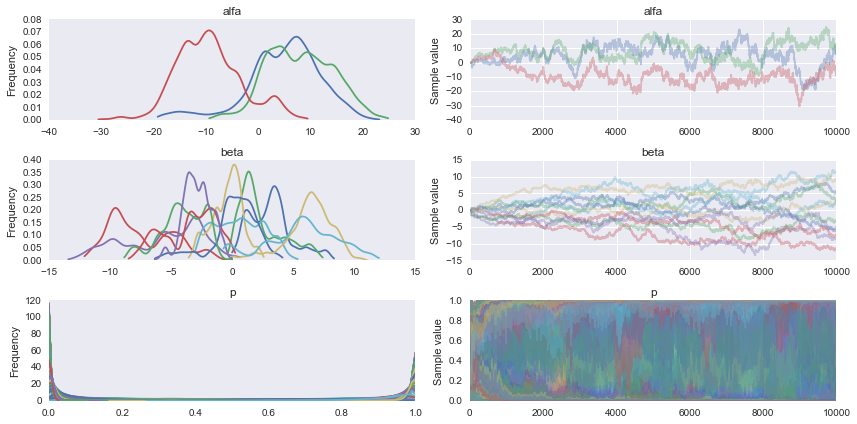

In [132]:
pm.plots.traceplot(trace);

In [20]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [71]:
iris[(iris.species != 'setosa') & (iris.species != 'versicolor')].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [110]:
X_test = np.array([[5.1, 3.5, 1.4, 0.2], # setosa
          [7.0, 3.2, 4.7, 1.4], # versicolor
          [6.5, 3.0, 5.8, 2.2]  # virginica
         ])

In [96]:
X_shared.set_value(X_test)

In [97]:
ppc = pm.sample_ppc(trace, samples=500, model=model)

In [78]:
y_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [115]:
X_test

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 7. ,  3.2,  4.7,  1.4],
       [ 6.5,  3. ,  5.8,  2.2]])

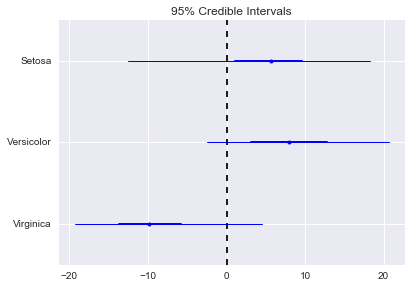

In [135]:
pm.forestplot(trace, varnames=['alfa'], ylabels=['Setosa', "Versicolor", "Virginica"])

In [99]:
list(ppc.keys())

['y']

In [101]:
ppc['y']

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       ..., 
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [121]:
df = pd.read_csv("data/uci-breast-cancer.csv")

In [122]:
df.head()

,age,menopause,tumor_size,inc_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [123]:
sub = df[['age', 'deg_malig', 'tumor_size']]

In [124]:
sub.head()

,age,deg_malig,tumor_size
0,'40-49','3','15-19'
1,'50-59','1','15-19'
2,'50-59','2','35-39'
3,'40-49','3','35-39'
4,'40-49','2','30-34'


In [98]:
sub['age'].unique()

array(["'40-49'", "'50-59'", "'60-69'", "'30-39'", "'70-79'", "'20-29'"], dtype=object)

In [125]:
sub.groupby(['deg_malig','tumor_size', 'age']).count()

Empty DataFrame
Columns: []
Index: [('1', '0-4', '50-59'), ('1', '0-4', '70-79'), ('1', '10-14', '30-39'), ('1', '10-14', '40-49'), ('1', '10-14', '50-59'), ('1', '10-14', '60-69'), ('1', '15-19', '30-39'), ('1', '15-19', '50-59'), ('1', '15-19', '60-69'), ('1', '15-19', '70-79'), ('1', '20-24', '40-49'), ('1', '20-24', '50-59'), ('1', '20-24', '60-69'), ('1', '25-29', '30-39'), ('1', '25-29', '40-49'), ('1', '25-29', '50-59'), ('1', '25-29', '60-69'), ('1', '30-34', '30-39'), ('1', '30-34', '40-49'), ('1', '30-34', '50-59'), ('1', '30-34', '60-69'), ('1', '35-39', '40-49'), ('1', '40-44', '30-39'), ('1', '40-44', '40-49'), ('1', '40-44', '70-79'), ('1', '45-49', '60-69'), ('1', '5-9', '40-49'), ('1', '5-9', '60-69'), ('1', '50-54', '50-59'), ('2', '0-4', '30-39'), ('2', '0-4', '40-49'), ('2', '0-4', '50-59'), ('2', '10-14', '30-39'), ('2', '10-14', '40-49'), ('2', '10-14', '50-59'), ('2', '10-14', '60-69'), ('2', '10-14', '70-79'), ('2', '15-19', '40-49'), ('2', '15-19', '50-59'), ('2', '15-19', '60-69'), ('2', '20-24', '30-39'), ('2', '20-24', '40-49'), ('2', '20-24', '50-59'), ('2', '20-24', '60-69'), ('2', '25-29', '30-39'), ('2', '25-29', '40-49'), ('2', '25-29', '50-59'), ('2', '25-29', '60-69'), ('2', '30-34', '30-39'), ('2', '30-34', '40-49'), ('2', '30-34', '50-59'), ('2', '30-34', '60-69'), ('2', '35-39', '20-29'), ('2', '35-39', '40-49'), ('2', '35-39', '50-59'), ('2', '40-44', '30-39'), ('2', '40-44', '40-49'), ('2', '40-44', '50-59'), ('2', '40-44', '60-69'), ('2', '45-49', '40-49'), ('2', '5-9', '30-39'), ('2', '5-9', '50-59'), ('2', '50-54', '40-49'), ('2', '50-54', '50-59'), ('2', '50-54', '60-69'), ('3', '0-4', '40-49'), ('3', '10-14', '50-59'), ('3', '10-14', '60-69'), ('3', '15-19', '30-39'), ('3', '15-19', '40-49'), ('3', '15-19', '60-69'), ('3', '20-24', '30-39'), ('3', '20-24', '40-49'), ('3', '20-24', '50-59'), ('3', '20-24', '60-69'), ('3', '20-24', '70-79'), ('3', '25-29', '30-39'), ('3', '25-29', '40-49'), ('3', '25-29', '50-59'), ('3', '25-29', '60-69'), ('3', '30-34', '30-39'), ('3', '30-34', '40-49'), ('3', '30-34', '50-59'), ('3', '30-34', '60-69'), ('3', '35-39', '30-39'), ('3', '35-39', '40-49'), ('3', '35-39', '50-59'), ('3', '35-39', '60-69'), ('3', '40-44', '30-39'), ('3', '40-44', '40-49'), ('3', '40-44', '50-59'), ('3', '40-44', '60-69'), ('3', '45-49', '60-69'), ('3', '50-54', '60-69')]

[94 rows x 0 columns]

In [126]:
sub[(sub['deg_malig'] == "'3'") & (sub['tumor_size'] == "'0-4'")]

,age,deg_malig,tumor_size
52,'40-49','3','0-4'


In [133]:
deg_malig = pd.Categorical(sub.deg_malig).labels
tumor_size = pd.Categorical(sub.tumor_size).labels
age = pd.Categorical(sub.age).labels

In [138]:
set(age)

{0, 1, 2, 3, 4, 5}

In [144]:
sub.iloc[0]

age           '40-49'
deg_malig         '3'
tumor_size    '15-19'
Name: 0, dtype: object

In [146]:
print(deg_malig[0])
print(tumor_size[0])

2
2


In [147]:
sub.tumor_size.unique()

array(["'15-19'", "'35-39'", "'30-34'", "'25-29'", "'40-44'", "'10-14'",
       "'0-4'", "'20-24'", "'45-49'", "'50-54'", "'5-9'"], dtype=object)

In [153]:
x_obs = tumor_size
y_obs = age

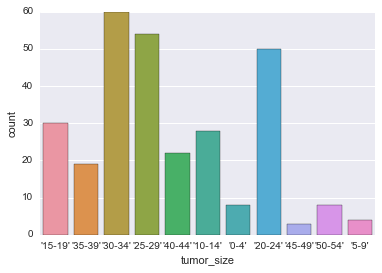

In [154]:
sns.countplot(sub.tumor_size)

In [168]:
p_obs = list(Counter(x_obs).values())
p_obs = [p / len(x_obs) for p in p_obs]

In [175]:
p_obs

[0.027972027972027972,
 0.0979020979020979,
 0.1048951048951049,
 0.17482517482517482,
 0.1888111888111888,
 0.2097902097902098,
 0.06643356643356643,
 0.07692307692307693,
 0.01048951048951049,
 0.013986013986013986,
 0.027972027972027972]

In [185]:
set(age)

{0, 1, 2, 3, 4, 5}

In [261]:
# pd.crosstab([df.deg_malig, df.tumor_size], df.age, margins=True)
pd.crosstab(df.age, df.deg_malig, margins=True)

deg_malig,'1','2','3',All
age,,,,
'20-29',0,1,0,1
'30-39',7,17,12,36
'40-49',18,48,24,90
'50-59',25,39,32,96
'60-69',17,24,16,57
'70-79',4,1,1,6
All,71,130,85,286


In [262]:
cpt = pd.crosstab(df.age, df.tumor_size).values
# cpt = sub[["age", "tumor_size"]].values

In [266]:
data = np.column_stack([age, tumor_size])

In [273]:
d = np.array([age, tumor_size])

In [263]:
cpt

array([[ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  2,  5,  6,  6,  7,  3,  4,  0,  1,  0],
       [ 2,  8,  5, 21, 18, 20,  7,  5,  1,  1,  2],
       [ 3,  9, 10, 14, 21, 20,  7,  8,  0,  1,  3],
       [ 0,  8,  9,  8,  9, 13,  1,  3,  2,  1,  3],
       [ 1,  1,  1,  1,  0,  0,  0,  2,  0,  0,  0]])

In [277]:
df[['age', 'deg_malig']].values

array([["'40-49'", "'3'"],
       ["'50-59'", "'1'"],
       ["'50-59'", "'2'"],
       ["'40-49'", "'3'"],
       ["'40-49'", "'2'"],
       ["'50-59'", "'2'"],
       ["'50-59'", "'3'"],
       ["'40-49'", "'2'"],
       ["'40-49'", "'2'"],
       ["'40-49'", "'2'"],
       ["'50-59'", "'2'"],
       ["'60-69'", "'2'"],
       ["'50-59'", "'1'"],
       ["'50-59'", "'2'"],
       ["'40-49'", "'2'"],
       ["'30-39'", "'3'"],
       ["'50-59'", "'1'"],
       ["'60-69'", "'2'"],
       ["'50-59'", "'2'"],
       ["'50-59'", "'3'"],
       ["'50-59'", "'1'"],
       ["'60-69'", "'2'"],
       ["'50-59'", "'2'"],
       ["'40-49'", "'1'"],
       ["'30-39'", "'3'"],
       ["'50-59'", "'2'"],
       ["'50-59'", "'2'"],
       ["'40-49'", "'1'"],
       ["'60-69'", "'3'"],
       ["'40-49'", "'3'"],
       ["'60-69'", "'3'"],
       ["'60-69'", "'1'"],
       ["'50-59'", "'3'"],
       ["'50-59'", "'3'"],
       ["'40-49'", "'1'"],
       ["'30-39'", "'1'"],
       ["'40-49'", "'2'"],
 

In [284]:
with pm.Model() as model:
    
    def likelihood(value):
        return 0.5

#     like = pm.DensityDist('like', likelihood, shape=2, testval = [1,1])
    like = pm.DensityDist('like', likelihood, observed=data, shape=2, testval = [[1, 1]])
    y = pm.Categorical('deg_malig', p=like, observed=deg_malig)
    step = pm.Metropolis()
    trace = pm.sample(1000, step)

IndexError: index 2 is out of bounds for axis 1 with size 2

In [196]:
len(x_obs)

286

In [188]:
x_obs = pd.Categorical(df.age).labels
y_obs = pd.Categorical(df['class']).labels

with pm.Model() as model:
#     age = pm.Multinomial('age', p=probs, n=len(x_obs))
    a = pm.Dirichlet('a', np.ones(11))
    y = pm.Categorical('y', p=a, observed=y_obs)
    step = pm.Metropolis()
    trace = pm.sample(10000, step)

Applied stickbreaking-transform to a and added transformed a_stickbreaking to model.
a
 [-----------------100%-----------------] 100000 of 100000 complete in 13.6 sec

In [191]:
help(pm.Multinomial)

Help on class Multinomial in module pymc3.distributions.multivariate:

class Multinomial(pymc3.distributions.distribution.Discrete)
 |  Multinomial log-likelihood.
 |  
 |  Generalizes binomial distribution, but instead of each trial resulting
 |  in "success" or "failure", each one results in exactly one of some
 |  fixed finite number k of possible outcomes over n independent trials.
 |  'x[i]' indicates the number of times outcome number i was observed
 |  over the n trials.
 |  
 |  .. math::
 |  
 |     f(x \mid n, p) = \frac{n!}{\prod_{i=1}^k x_i!} \prod_{i=1}^k p_i^{x_i}
 |  
 |  ==========  ===========================================
 |  Support     :math:`x \in \{0, 1, \ldots, n\}` such that
 |              :math:`\sum x_i = n`
 |  Mean        :math:`n p_i`
 |  Variance    :math:`n p_i (1 - p_i)`
 |  Covariance  :math:`-n p_i p_j` for :math:`i \ne j`
 |  ==========  ===========================================
 |  
 |  Parameters
 |  ----------
 |  n : int
 |      Number of tri

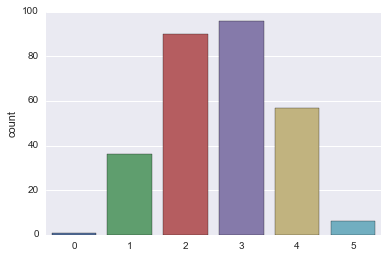

In [70]:
sns.countplot(x_obs);

In [71]:
pm.summary(trace)


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.692            0.027            0.000            [0.639, 0.745]
  0.294            0.027            0.000            [0.242, 0.346]
  0.003            0.006            0.000            [0.000, 0.010]
  0.004            0.003            0.000            [0.000, 0.010]
  0.003            0.003            0.000            [0.000, 0.010]
  0.003            0.003            0.000            [0.000, 0.010]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.638          0.674          0.692          0.710          0.744
  0.243          0.276          0.294          0.312          0.348
  0.000          0.001          0.002          0.005          0.013
  0.000          0.001          0.003          0.005          0.013
  0.000       

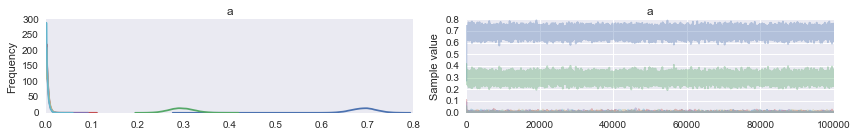

In [46]:
pm.plots.traceplot(trace);

In [55]:
ppc = pm.sample_ppc(trace, samples=1000, model=model, size=500)

In [56]:
np.asarray(ppc['y']).shape

(1000, 500)

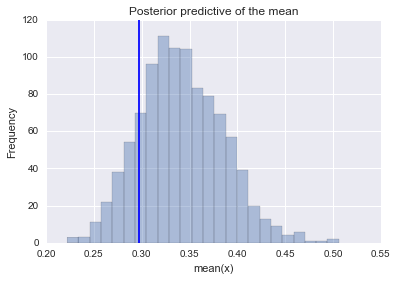

In [57]:
ax = plt.subplot()
sns.distplot([n.mean() for n in ppc['y']], kde=False, ax=ax)
ax.axvline(y_obs.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [30]:
from collections import Counter
probs = []
for (i, c) in Counter(x_obs).items():
    probs.append(c / len(x_obs))

In [ ]:
y_2 = pd.Categorical(iris['species']).labels
x_n = iris.columns[:-1]
X = iris[x_n].values

X_shared = shared(X)

with pm.Model() as model:
    alfa = pm.Normal('alfa', mu=0, sd=10, shape=3)
    beta = pm.Normal('beta', mu=0, sd=10, shape=(4,3))

    mu = alfa + pm.dot(X_shared, beta)
    p = pm.Deterministic('p', T.nnet.softmax(mu))

    y = pm.Categorical('y', p=p, observed=y_2)
    step = pm.Metropolis()
    trace = pm.sample(10000, step)

In [80]:
# X_p = pm.Uniform("X_p", 0, 1)
# X = pm.Bernoulli("X", X_p, values=x_obs, observed=True)
# Y0_p = pm.Uniform("Y0_p", 0, 1)
# Y0 = pm.Bernoulli("Y0", Y0_p, values=y_obs, observed=True)
with pm.Model() as model:
    pm.Discrete("x")

AttributeError: <pymc3.distributions.distribution.Discrete object at 0x11ca210f0> has no finite default value to use, checked: ['mode'] pass testval argument or adjust so value is finite.